# Housing Dataset

**Price prediction & House Recommendation System**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = "USA_Housing.csv"
df = pd.read_csv(data)
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1059033.56,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1505890.92,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1058987.99,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1260616.81,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,630943.49,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1060193.79,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1482617.73,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1030729.58,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1198656.87,USS Wallace\nFPO AE 73316


## Attribute understanding

1. **Avg. Area Income:** This is an average Income that the people are earning in this area.
2. **Avg. Area House Age:** An average age of house is given which varies from 2-9 years.
3. **Avg. Area Number of Rooms:** An average number of rooms in the area which may affect the price of the house.
4. **Avg. Area Number of Brdrooms:** An average number of bedrooms that are there in the given area.
5. **Area Population:** Number of people living in that area.
6. **Price:** This the price of the house that is to be calculated on the basis of the above attributes.
7. **Address:** It is the address of that residence where this price houses are there.

> **note:** This data has all the average data so that the price that would be predicted would also be average


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


- there are no null values in any of the rows present, so we are good to go.


In [4]:
df_describe = df.describe()
df_describe

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


**Now let us see that data is describing to us**

- Count of each row is 5000 as it is not having any null values in there so we are getting a complete row count.
- In the second row we are given the average of the average values, sounds funny right.. Jokes apart, mean is basically the measurment of central tendency and gives us the average of the distribution.
- std: which is also know as standard deviation which help us to know the trend of the data and help us to gain a perspective and low level understanding.
- min: Minimum value that is present in the dataset.
- max: maximum value that is present in the dataset.

> this is the description based on the statstical calculation of the data.


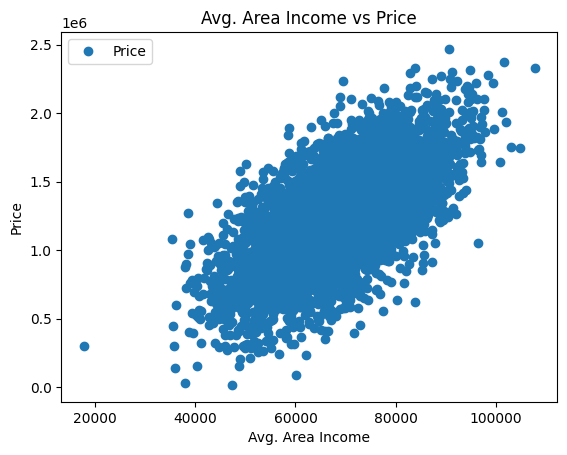

In [5]:
df.plot(x='Avg. Area Income', y='Price', style='o')
plt.title('Avg. Area Income vs Price')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.show()

**Now let us see that how does Avg. Area Income affects the price of the house.**

- it increases the price of the house as the income increases.
- it is a positive correlation.


<Axes: >

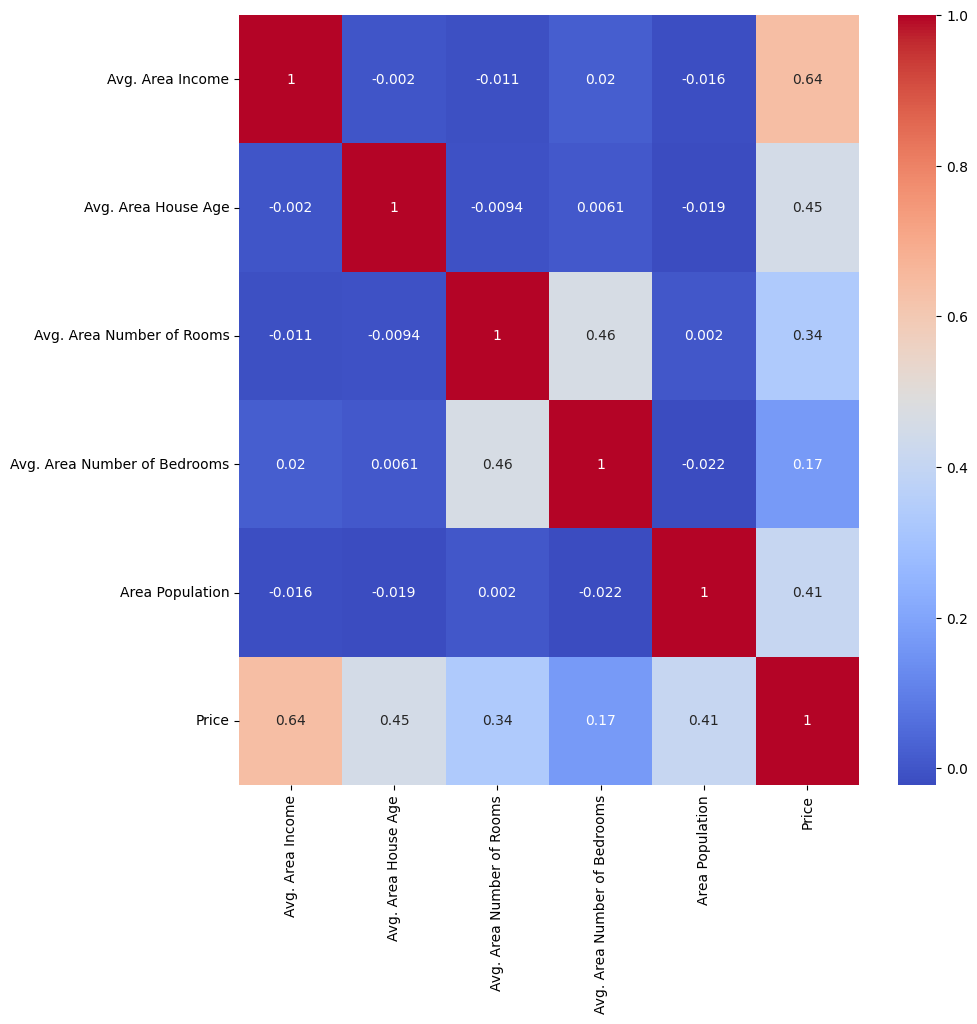

In [6]:
df_plot = df.drop(['Address'], axis=1)
df_corr = df_plot.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

In [7]:
df_above_avg_income = df[(df['Avg. Area Income'] > df_describe['Avg. Area Income']['mean']) & (
    df['Price'] > df_describe['Price']['mean'])]
df_above_avg_income

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1505890.92,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
7,78394.33928,6.989780,6.620478,2.42,36516.35897,1573936.56,"972 Joyce Viaduct\nLake William, TN 17778-6483"
9,81885.92718,4.423672,8.167688,6.10,40149.96575,1545154.81,Unit 9446 Box 0958\nDPO AE 97025
10,80527.47208,8.093513,5.042747,4.10,47224.35984,1707045.72,"6368 John Motorway Suite 700\nJanetbury, NM 26854"
13,73163.66344,6.919535,5.993188,2.27,32326.12314,1291331.52,"829 Welch Track Apt. 992\nNorth John, AR 26532..."
...,...,...,...,...,...,...,...
4986,71060.40601,5.718839,7.222730,4.34,34814.58559,1260241.40,"5611 Matthew Avenue\nLake Kevin, FM 72963-8891"
4991,74102.19189,5.657841,7.683993,3.13,24041.27059,1263720.52,"2871 John Lodge\nAmychester, GU 61734-5597"
4992,87499.12574,6.403473,4.836091,4.02,40815.19968,1568700.59,Unit 2096 Box 9559\nDPO AE 80983-8797
4993,69639.14090,5.007510,7.778375,6.05,54056.12843,1381830.78,"5259 David Causeway Apt. 975\nSouth Alexstad, ..."


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = df[['Avg. Area Income', 'Avg. Area Number of Rooms',
        'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)

print(regressor.coef_)

y_pred = regressor.predict(X_test)

df_pred = pd.DataFrame(
    {'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_pred

[-1618810.07607745]
[[2.17323025e+01 1.15498366e+05 3.04764101e+03 1.49078846e+01]]


,Actual,Predicted
0,1300389.35,1.168573e+06
1,1581817.41,1.458274e+06
2,1247581.21,1.567827e+06
3,1243239.00,1.414916e+06
4,1017374.02,1.081288e+06
...,...,...
1495,1323959.80,1.019353e+06
1496,959102.08,1.073889e+06
1497,1489667.75,1.327272e+06
1498,1148749.93,1.200921e+06


In [9]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 153577.00166222
Mean Squared Error: 37188866307.23371


In [10]:
# accuracy
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 192844.1503059756


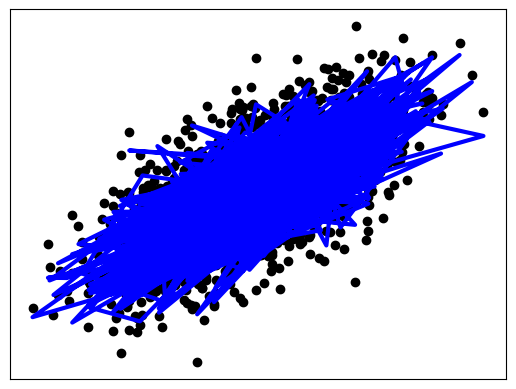

In [11]:
# plot outputs
plt.scatter(X_test['Avg. Area Income'], y_test,  color='black')
plt.plot(X_test['Avg. Area Income'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [12]:
import pickle

# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [13]:
# give the address according to the price
address = df[(df['Price'] <= y_pred.mean())]

In [14]:
list_address = list(address.iloc[0:10][['Address', 'Price']].values)

In [15]:
list_address

[array(['208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101', 1059033.56],
       dtype=object),
 array(['9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489', 1058987.99],
       dtype=object),
 array(['USNS Raymond\nFPO AE 09386', 630943.49], dtype=object),
 array(['06039 Jennifer Islands Apt. 443\nTracyport, KS 16077', 1068138.07],
       dtype=object),
 array(['USS Gilbert\nFPO AA 20957', 798869.53], dtype=object),
 array(['911 Castillo Park Apt. 717\nDavisborough, PW 78603', 663732.4],
       dtype=object),
 array(['209 Natasha Stream Suite 961\nHuffmanland, NE 52457', 1042814.1],
       dtype=object),
 array(['5498 Rachel Locks\nNew Gregoryshire, PW 54755', 528485.25],
       dtype=object),
 array(['Unit 7424 Box 2786\nDPO AE 71255', 1019425.94], dtype=object),
 array(['19696 Benjamin Cape\nStephentown, ME 36952-4733', 1030591.43],
       dtype=object)]

# Deep Learning Method


> installing pytorch


In [16]:
!pip3 install torch torchvision torchaudio

Import the libraries

In [17]:
import torch
from torch.autograd import Variable

created a data variable which tends to fit in the data X (features) and y (test) to train our model

In [18]:
X = Variable(torch.Tensor(df[['Avg. Area Income', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']].values))
y = Variable(torch.Tensor(df['Price'].values))

In [19]:
print(X)

tensor([[7.9545e+04, 7.0092e+00, 4.0900e+00, 2.3087e+04],
        [7.9249e+04, 6.7308e+00, 3.0900e+00, 4.0173e+04],
        [6.1287e+04, 8.5127e+00, 5.1300e+00, 3.6882e+04],
        ...,
        [6.3391e+04, 4.8051e+00, 2.1300e+00, 3.3266e+04],
        [6.8001e+04, 7.1301e+00, 5.4400e+00, 4.2626e+04],
        [6.5511e+04, 6.7923e+00, 4.0700e+00, 4.6501e+04]])


In [20]:
print(y)

tensor([1059033.5000, 1505890.8750, 1058988.0000,  ..., 1030729.5625,
        1198656.8750, 1298950.5000])


Moving further here I have created a linear regression model with 4 features

In [21]:
class LinearRegression(torch.nn.Module):

    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(4, 1)

    def forward(self, x):
        predict_y = self.linear(x)
        return predict_y

In [22]:
linear_model = LinearRegression()

created the criterias for loss function and optimizers to imporve the accuracy of the model
- we have used Mean Squared Error as our loss function which is also a legacy loss function for regression problems
- we have used Stocastic Gradient Descent as our optimizer which is an iterative method for optimizing an objective function

In [23]:
define_criterion = torch.nn.MSELoss(size_average=False)

SGD_optimizer = torch.optim.SGD(linear_model.parameters(), lr=0.01)

/Users/divyeshpatel/anaconda3/envs/housing/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Here we go..
we have started our traing here with 25 epochs

In [24]:
for epoch in range(1): 
    predict_y = linear_model(X) 
    loss = define_criterion(predict_y, y) 
    SGD_optimizer.zero_grad() 
    loss.backward() 

    SGD_optimizer.step() 
    print('epoch {}, loss function {}'.format(epoch+1, loss.item()))

epoch 1, loss function 4.2613226799947055e+19


/Users/divyeshpatel/anaconda3/envs/housing/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([5000])) that is different to the input size (torch.Size([5000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


NOW IT'S TIME TO TEST the model

In [25]:
test = Variable(torch.Tensor([[79248.64245, 6.730821, 3.09, 1059033.56]]))
predict = linear_model(test)
print("predict value: ", predict.data[0][0])

predict value:  tensor(2.7476e+22)
